## Datenanalyse Application

Dieses Dokument dient zur Einarbeitung in die Datensätze Application Train & Application Test. Diese Datensätze enthalten Stammdaten über die Kreditnehmer.
Ziel ist es ein Verständnis der einzelnen Attribute zu erlangen und ein Gefühl für deren Zusammenspiel zu gewinnen. Weiterhin sollen fehlerhafte Daten identifiziert werden.

### Vorbereitung: Import benötigter Bibliotheken & Einlesen der Daten

In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import display, Markdown

# siehe Hilfscode.py
from Hilfscode import draw_piechart
from Hilfscode import cat_compare
from Hilfscode import lorenz

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_test = pd.read_csv(DATASET_DIR / "application_test.csv")
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")

description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

### Beschreibungen der Attribute untergliedert nach den gegebenen CSV-Dateien

In [4]:
des = description.loc[description['Table']=="application_{train|test}.csv", "Row":"Special"]

### Anpassung der numerischen Kategorien

In [5]:
app_train["TARGET"].replace(
    {
        0: "Payback",
        1: "Default"
    }, inplace = True
)

## Untersuchung Application-Train & Application-Test
### Erstellung von Subklassen

* payback = Kreditnehmer die ihren Kredit zurückzahlten
* default = Kreditnehmer die ihren Kredit nicht zurückzahlten
* n = nominale Daten
* m = metrische Daten
* md = diskrete metrische Daten
* mdp = diskrete metrische Daten der Kreditnehmer die ihren Kredit zurückzahlten
* mdd = diskrete metrische Daten der Kreditnehmer die ihren Kredit nicht zurückzahlten
* ms = stetige metrische Daten
* msp = stetige metrische Daten der Kreditnehmer die ihren Kredit zurückzahlten
* msd = stetige metrische Daten der Kreditnehmer die ihren Kredit nicht zurückzahlten

In [6]:
n_heads = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
m_heads = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
md_heads = ['CNT_CHILDREN', "CNT_FAM_MEMBERS","HOUR_APPR_PROCESS_START", "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
ms_heads = [head for head in m_heads if head not in md_heads]

In [7]:
payback = app_train[app_train["TARGET"] == "Payback"]
default = app_train[app_train["TARGET"] == "Default"]

m = app_train[m_heads]
n = app_train[n_heads]

md = m[md_heads]
mdp = md[app_train["TARGET"] == "Payback"]
mdd = md[app_train["TARGET"] == "Default"]

ms = m[ms_heads]
msp = ms[app_train["TARGET"] == "Payback"]
msd = ms[app_train["TARGET"] == "Default"]

## Untersuchung der Kreditnehmer - Payback vs. Default

Im Datensatz befinden sich 91,9% zurückzahlende Kreditnehmer.

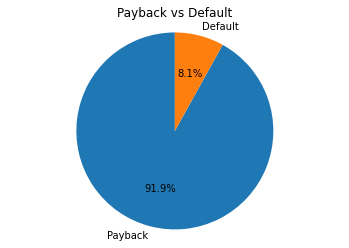

In [8]:
pb = len(payback.index)
df = len(default.index)
N = pb + df

labels = "Payback", "Default"
sizes = [pb/N,df/N]
title = "Payback vs Default"

arguments = [(labels, sizes, title)]
draw_piechart(arguments)

In [20]:
n.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,Default,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,1,0,Laborers,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Payback,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,1,1,0,1,1,0,Core staff,1,1,MONDAY,0,0,0,0,0,0,School,reg oper account,block of flats,Block,No,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Payback,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,1,1,1,0,Laborers,2,2,MONDAY,0,0,0,0,0,0,Government,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Payback,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,1,0,0,Laborers,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Payback,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,0,0,Core staff,2,2,THURSDAY,0,0,0,0,1,1,Religion,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
print(f"Anzahl Kreditnehmer: {len(app_train)}")
print(f"Anzahl Variablen: {len(app_train.columns) - 2}") # ID & Target dont count as variables
print(f"Anzahl metrischer Variablen: {len(m.columns)}")
print(f"Anzahl nominale Variablen: {len(n.columns) - 1}") # Target doesnt count as variable

Anzahl Kreditnehmer: 307511
Anzahl Variablen: 120
Anzahl metrischer Variablen: 70
Anzahl nominale Variablen: 50


## kategorische Variablen

### Bestimmung der wichtigsten Kategorien

Folgend werden die wichtigsten 10 Kategorien bestimmt, mit denen die man die Menge der Kreditnehmer bestmöglich nach Payback oder Default unterscheiden kann. Als Kennzahl dient die Differenz der relativen Häufigkeiten.

Berechnungsbeispiel:
* 66,6 % aller zurückzahlenden Kreditnehmer sind Frauen
* 57,1 % aller ausfallenden Kreditnehmer sind Frauen
* -> Eine Kreditrückzahlung durch eine Frau ist 9,5 pP höher als ein Kreditausfall durch eine Frau.

Am Ende des Dokuments wird diese Betrachtung für alle kategorischen Variablen durchgeführt.

In [9]:
top10 = []
bot10 = []

for head in n.columns.values:
    df1 = payback[head].value_counts().rename_axis(head).reset_index(name='payback').head()
    df2 = default[head].value_counts().rename_axis(head).reset_index(name='default').head()
    
    df1["payback"] = df1["payback"]/df1["payback"].sum()*100
    df2["default"] = df2["default"]/df2["default"].sum()*100
    
    df = df1.merge(df2, how="outer", on=head)
    
    df["change"] = (df["default"]-df["payback"])
    
    df = df.sort_values("change", ascending=False)
    
    for element in df["change"]:
        if np.isnan(element):
            continue
        if len(top10) < 10:
            row = df.loc[df["change"] == element]
            cat = row[head][row[head].index[0]]
            top10.append((head, cat, element))
        else:
            if element > top10[-1][-1]:
                top10.pop(-1)
                row = df.loc[df["change"] == element]
                cat = row[head][row[head].index[0]]
                top10.append((head, cat, element))
        
        top10 = sorted(top10, key=lambda value: value[2], reverse=True)
    
    df = df.sort_values("change", ascending=True)

    for element in df["change"]:
        if np.isnan(element):
            continue
        if len(bot10) < 10:
            row = df.loc[df["change"] == element]
            cat = row[head][row[head].index[0]]
            bot10.append((head, cat, element))
        else:
            if element < bot10[-1][-1]:
                bot10.pop(-1)
                row = df.loc[df["change"] == element]
                cat = row[head][row[head].index[0]]
                bot10.append((head, cat, element))
        
        bot10 = sorted(bot10, key=lambda value: value[2], reverse=False)
    
# typische Paybacks
df = pd.DataFrame(bot10, columns=["Kategorie","Unterkategorie","Top 10 Payback"])
display(df)
    
# typische Defaults
df = pd.DataFrame(top10,columns=["Kategorie","Unterkategorie","Top 10 Default"])
display(df)

,Kategorie,Unterkategorie,Top 10 Payback
0,ORGANIZATION_TYPE,XNA,-10.612452
1,CODE_GENDER,F,-9.523671
2,NAME_EDUCATION_TYPE,Higher education,-8.915516
3,REG_CITY_NOT_WORK_CITY,0,-7.883082
4,FLAG_DOCUMENT_3,0,-7.386514
5,NAME_INCOME_TYPE,Pensioner,-6.518111
6,FLAG_EMP_PHONE,0,-6.486361
7,OCCUPATION_TYPE,Core staff,-6.032228
8,REGION_RATING_CLIENT_W_CITY,1,-4.838815
9,OCCUPATION_TYPE,Managers,-4.825831


,Kategorie,Unterkategorie,Top 10 Default
0,NAME_INCOME_TYPE,Working,10.544642
1,CODE_GENDER,M,9.525086
2,NAME_EDUCATION_TYPE,Secondary / secondary special,8.297446
3,REG_CITY_NOT_WORK_CITY,1,7.883082
4,FLAG_DOCUMENT_3,1,7.386514
5,FLAG_EMP_PHONE,1,6.486361
6,REGION_RATING_CLIENT,3,6.416818
7,REGION_RATING_CLIENT_W_CITY,3,6.398668
8,OCCUPATION_TYPE,Laborers,6.329470
9,ORGANIZATION_TYPE,Business Entity Type 3,5.712701


### Payback

Ein zurückzahlender Kreditnehmer hat typischerweise folgende Charakteristika:
* unbekanntes Arbeitsfeld
* weiblich
* akademischer Abschluss
* arbeitet und wohnt in der selben Stadt
* hat Dokument nicht 3 abgegeben
* Rentner
* hat kein Arbeitstelefon
* ist/war ein wichtiger Mitarbeiter seiner Firma
* wohnt in Region 1
* ist/war ein Manager seiner Firma

### Default

Ein ausfallender Kreditnehmer hat typischerweise folgende Charakteristika:
* erzielt sein Einkommen aus der Arbeit
* männlich
* sekundärer Abschluss
* arbeitet und wohnt in der selben Stadt
* hat Dokument 3 abgegeben
* hat ein Arbeitstelefon
* wohnt in Region 3
* ist ein normaler Mitarbeiter
* Arbeitet in dem Arbeitsoranisationstyp Business Entity Type 3

### Verhältnis Payback zu Default nach Geschlecht

#### CODE_GENDER

#### Payback

F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64 



#### Default

F    14170
M    10655
Name: CODE_GENDER, dtype: int64 



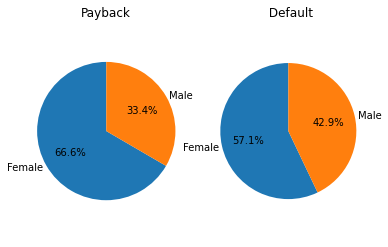

In [10]:
column = "CODE_GENDER"

# Payback
title = "Payback"
rest = -1
labels = ["Female", "Male"]
count1 = payback[column].value_counts()
N1 = len(payback[column])
arg_payback = cat_compare(count1, N1, column, title, rest, labels)

# Default
title = " Default"
rest = 0
labels = ["Female", "Male"]
count2 = default[column].value_counts()
N2 = len(default[column])

# Prints
display(Markdown("#### {}".format(column)))
display(Markdown("#### Payback"))
print(count1, "\n")
display(Markdown("#### Default"))
print(count2, "\n")

# Piecharts
arg_default = cat_compare(count2, N2, column, title, rest, labels)
draw_piechart([arg_payback, arg_default])

### Verhältnis Payback zu Default nach Bildung

#### NAME_EDUCATION_TYPE

#### Payback

Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64 



#### Default

Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64 



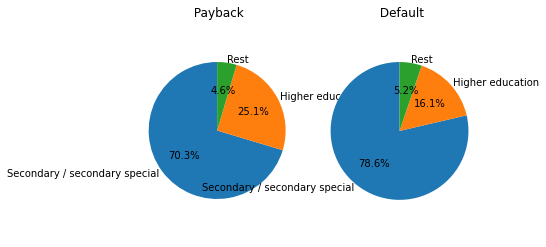

In [11]:
column = "NAME_EDUCATION_TYPE"

# Payback
title = " Payback"
rest = -2
labels = None
count1 = payback[column].value_counts()
N1 = len(payback[column])
arg_payback = cat_compare(count1, N1, column, title, rest, labels)

# Default
title = " Default"
rest = -2
count2 = default[column].value_counts()
N2 = len(default[column])

# Prints
display(Markdown("#### {}".format(column)))
display(Markdown("#### Payback"))
print(count1, "\n")
display(Markdown("#### Default"))
print(count2, "\n")

# Piecharts

arg_default = cat_compare(count2, N2, column, title, rest, labels)
draw_piechart([arg_payback, arg_default])

### Verhältnis Payback zu Default nach Arbeitsorganisationstyp

#### ORGANIZATION_TYPE

#### Payback

Business Entity Type 3    61669
XNA                       52384
Self-employed             34504
Other                     15408
Medicine                  10456
Government                 9678
Business Entity Type 2     9653
School                     8367
Trade: type 7              7091
Kindergarten               6396
Construction               5936
Business Entity Type 1     5497
Transport: type 4          4897
Industry: type 9           3143
Trade: type 3              3131
Industry: type 3           2930
Security                   2923
Housing                    2723
Military                   2499
Industry: type 11          2470
Bank                       2377
Police                     2224
Agriculture                2197
Transport: type 2          2032
Postal                     1975
Security Ministries        1878
Trade: type 2              1767
Restaurant                 1599
Services                   1471
University                 1262
Industry: type 7           1202
Transpor

#### Default

Business Entity Type 3    6323
Self-employed             3908
XNA                       2990
Other                     1275
Business Entity Type 2     900
Construction               785
Trade: type 7              740
Medicine                   737
Government                 726
School                     526
Transport: type 4          501
Business Entity Type 1     487
Kindergarten               484
Trade: type 3              361
Industry: type 3           348
Security                   324
Agriculture                257
Housing                    235
Industry: type 11          234
Industry: type 9           225
Restaurant                 212
Transport: type 3          187
Postal                     182
Transport: type 2          172
Military                   135
Trade: type 2              133
Bank                       130
Police                     117
Industry: type 1           115
Industry: type 7           105
Services                   104
Security Ministries         96
Industry

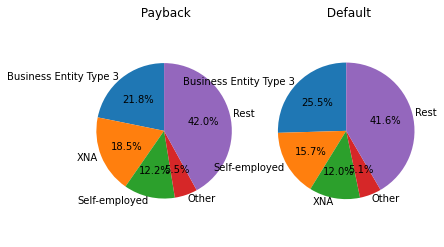

In [12]:
column = "ORGANIZATION_TYPE"

# Payback
title = " Payback"
rest = -53
labels = None
count1 = payback[column].value_counts()
N1 = len(payback[column])
arg_payback = cat_compare(count1, N1, column, title, rest, labels)

# Default
title = " Default"
rest = -53
count2 = default[column].value_counts()
N2 = len(default[column])

# Prints
display(Markdown("#### {}".format(column)))
display(Markdown("#### Payback"))
print(count1, "\n")
display(Markdown("#### Default"))
print(count2, "\n")

# Piecharts

arg_default = cat_compare(count2, N2, column, title, rest, labels)
draw_piechart([arg_payback, arg_default])

### Verhältnis Payback zu Default nach Einkommenstyp

#### NAME_INCOME_TYPE

#### Payback

Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64 



#### Default

Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64 



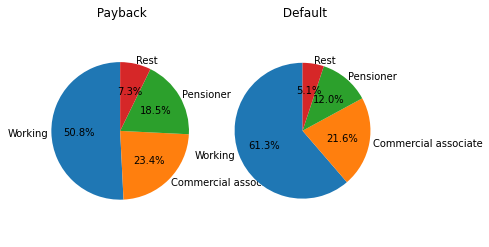

In [13]:
column = "NAME_INCOME_TYPE"

# Payback
title = " Payback"
rest = -4
labels = None
count1 = payback[column].value_counts()
N1 = len(payback[column])
arg_payback = cat_compare(count1, N1, column, title, rest, labels)

# Default
title = " Default"
rest = -2
count2 = default[column].value_counts()
N2 = len(default[column])

# Prints
display(Markdown("#### {}".format(column)))
display(Markdown("#### Payback"))
print(count1, "\n")
display(Markdown("#### Default"))
print(count2, "\n")

# Piecharts

arg_default = cat_compare(count2, N2, column, title, rest, labels)
draw_piechart([arg_payback, arg_default])

### Verhältnis Payback zu Default nach Karrierelevel

### Pearson Correlation
## Korrelaion aller Features des Trainingsdatensatzes

In [14]:
# plt.figure(figsize=(120,100))
# sns.heatmap(app_test.corr(), annot=True, cmap=plt.cm.Reds)
# plt.show()

### Korrelation der Features der zurückzahlenden Personen

In [15]:
# plt.figure(figsize=(120,100))
# sns.heatmap(payback.corr(), annot=True, cmap=plt.cm.Reds)
# plt.show()

### Korrelation der Features der ausfallenden Personen

In [16]:
# plt.figure(figsize=(120,100))
# sns.heatmap(default.corr(), annot=True, cmap=plt.cm.Reds)
# plt.show()

### Numerische Werte

In [17]:
t = app_train[app_train["TARGET"] == "Payback"]["EXT_SOURCE_1"]
t = t.dropna()
t.isna().sum() / len(t)

0.0

In [18]:
# df = pd.DataFrame(gini, ms.columns.values)
# df.sort_values(0)

In [ ]:
gini_p = []
vk_p = []
gini_d = []
vk_d = []

data = {}

for head in ms.columns.values:
    p,d = lorenz(msp[head], msd[head], visual = False)
    gini_p.append(p[0])
    gini_d.append(d[0])
    vk_p.append(p[1])
    vk_d.append(d[1])

data["Head"] = list(ms.columns.values)
data["Gini Payback"] = gini_p
data["Gini Default"] = gini_d
data["VK Payback"] = vk_p
data["VK Default"] = gini_d

df = pd.DataFrame(data)
df = df.set_index("Head")

#df[["VK Default"]].sort_values(by="VK Default")
#df[["VK Payback"]].sort_values(by="VK Payback")
df[["Gini Payback"]].sort_values(by="Gini Payback")
df[["Gini Default"]].sort_values(by="Gini Default")

Je höher der VK desto, desto unwahrscheinlicher ist eine Prognose in der Nähe des Mittelwertes.

In [ ]:
for head in ms.columns.values:
    print(head)
    lorenz(msp[head], msd[head])

In [21]:
# x_1, y_1 = sns.kdeplot(payback[head]).get_lines()[0].get_data()
# x_2, y_2 = sns.kdeplot(default[head]).get_lines()[1].get_data()

# x = np.array(list(zip(x_1, x_2)))
# y = np.array(list(zip(y_1, y_2)))

# maxi = np.maximum(y[:,0],y[:,1])
# mini = np.minimum(y[:,0],y[:,1])
# diff = np.subtract(maxi,mini)

# plt.plot(x_2, diff)

# rate = (np.trapz(diff, x_1) / np.trapz(maxi, x_1) * 100 + np.trapz(diff, x_2) / np.trapz(maxi, x_2) * 100) / 2
# rate

42.8525973257244

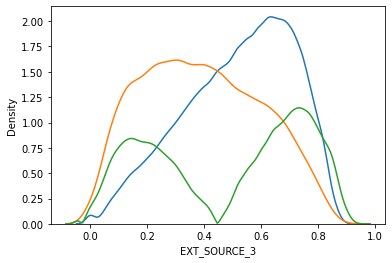

In [43]:
head = "EXT_SOURCE_3"
x_1, y_1 = sns.kdeplot(payback[head]).get_lines()[0].get_data()
x_2, y_2 = sns.kdeplot(default[head]).get_lines()[1].get_data()

x = np.array(list(zip(x_1, x_2)))
y = np.array(list(zip(y_1, y_2)))

maxi = np.maximum(y[:,0],y[:,1])
mini = np.minimum(y[:,0],y[:,1])
diff = np.subtract(maxi,mini)

plt.plot(x_2, diff)

rate = (np.trapz(diff, x_1) / np.trapz(maxi, x_1) * 100 + np.trapz(diff, x_2) / np.trapz(maxi, x_2) * 100) / 2
rate

In [34]:
payback[[head]].head()

,CNT_CHILDREN
1,0
2,0
3,0
4,0
5,0


In [39]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian').fit(payback[[head]])

In [ ]:
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
kde.score_samples(X_plot)

In [ ]:
for head in ms.columns.values:
    plt.hist(ms[head])
    plt.hist(msp[head])
    plt.hist(msd[head])
    plt.legend(labels=["All", "Payback","Default"])
    plt.title(head)
    plt.show()

In [ ]:
for head in md.columns.values:
    bins = md[head].value_counts()
    bins1 = mdp[head].value_counts()
    bins2 = mdd[head].value_counts()
    fig, ax = plt.subplots()
    ax.bar(bins.keys(), bins.values, label='All')
    ax.bar(bins1.keys(), bins1.values, label='Payback')
    ax.bar(bins2.keys(), bins2.values, label='Default')
    plt.xticks(np.arange(len(bins.keys())), bins.keys())
    plt.title(head)
    plt.legend()
    plt.show()

### Verhältnis Payback zu Default - komplette Liste der kategorischen Variablen

In [ ]:
for head in n.columns.values:
    df1 = payback[head].value_counts().rename_axis(head).reset_index(name='payback').head()
    df2 = default[head].value_counts().rename_axis(head).reset_index(name='default').head()
    
    df1["payback"] = df1["payback"]/df1["payback"].sum()*100
    df2["default"] = df2["default"]/df2["default"].sum()*100
    
    df = df1.merge(df2, how="outer", on=head)
    
    df["change"] = (df["default"]-df["payback"])
    #df["change"] = (df["payback"] / df["default"] * 100)
    
    df = df.sort_values("change", ascending=False)
    
    display(df)